In [4]:
!pip3 install pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.3 MB/s eta 0:00:00ta 0:00:01


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates

# Step 1: Load and clean the Qualtrics CSV file, extracting concise labels
def load_and_clean_data(file_path):
    # Load the CSV file without skipping rows initially
    df = pd.read_csv(file_path)

    # The second row contains the concise labels
    concise_labels = df.iloc[1]  # Extract the second row for concise labels

    # Now, skip the first two rows (metadata and labels) to get the actual data
    df = pd.read_csv(file_path, skiprows=[0,1])
    
    # Rename the columns with the concise labels extracted earlier
    df.columns = concise_labels

    # Identify and select relevant columns (based on concise labels containing certain keywords, adjust as needed)
    relevant_columns = [col for col in df.columns if 'comfortable' in col.lower() or 'confidence' in col.lower()]

    # Subset the dataframe to keep only the relevant attribute columns
    attribute_columns = df[relevant_columns]

    # Convert all the values to numeric, replacing non-numeric entries with NaN
    attribute_columns = attribute_columns.apply(pd.to_numeric, errors='coerce')

    return attribute_columns, relevant_columns  # Also return the extracted concise labels

# Step 2: Create the radar plot
def create_radar_plot(df, labels):
    # Number of variables we're plotting
    num_vars = len(df.columns)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle

    # Plotting the radar chart for each row (team member)
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Plot each row
    for idx, row in df.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the circle for radar plot
        ax.plot(angles, values, label=f'Response {idx+1}')
        ax.fill(angles, values, alpha=0.25)

    # Set the labels for each attribute
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Set plot title and legend
    plt.title('Radar Plot of Team Attributes')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Step 3: Create the parallel coordinates plot
def create_parallel_coordinates_plot(df):
    # Insert an identifier column for parallel coordinates
    df['Response'] = [f'Response {i+1}' for i in range(len(df))]
    
    # Plot parallel coordinates
    plt.figure(figsize=(10, 6))
    parallel_coordinates(df, 'Response', color=plt.cm.Set1.colors)
    plt.title('Parallel Coordinates Plot of Team Attributes')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


In [13]:
# Specify the file path (adjust this to your Qualtrics CSV file location)
file_path = 'CASCADE Lab - Team Attribute Evaluation Survey_October 3, 2024_22.02.csv'

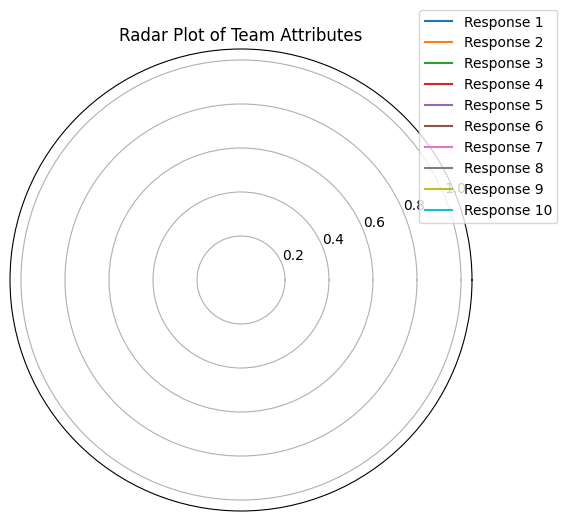

IndexError: list index out of range

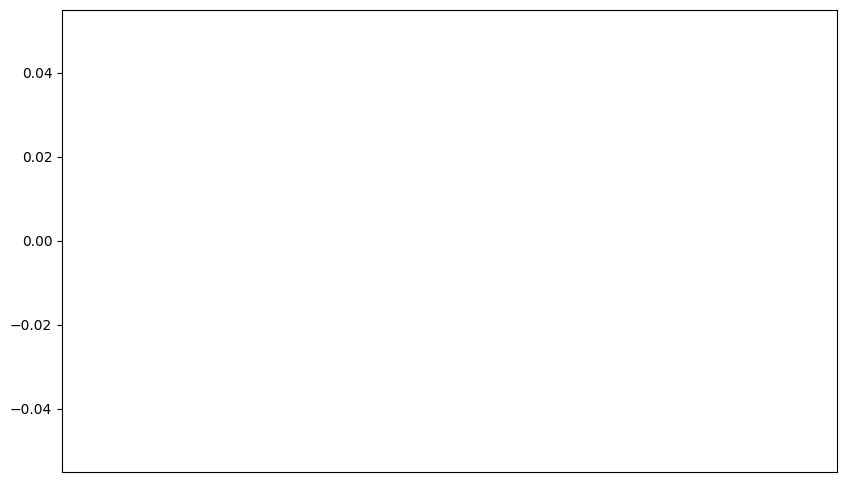

In [11]:

# Step 1: Load and clean the data, and extract concise labels
attribute_data, concise_labels = load_and_clean_data(file_path)

# Step 2: Create the radar plot with the extracted labels
create_radar_plot(attribute_data, concise_labels)

# Step 3: Create the parallel coordinates plot
create_parallel_coordinates_plot(attribute_data)

In [14]:
import pandas as pd

# Step 1: Load the cleaned data from Qualtrics (assuming the columns are already named properly)
def load_and_clean_data(file_path):
    # Load the CSV file, skipping metadata rows but keeping the actual header row
    df = pd.read_csv(file_path)

    # The second row contains the concise labels
    concise_labels = df.iloc[1]  # Extract the second row for concise labels

    # Now, skip the first two rows (metadata and labels) to get the actual data
    df = pd.read_csv(file_path, skiprows=[0, 1])
    
    # Rename the columns with the concise labels extracted earlier
    df.columns = concise_labels

    # Identify and select relevant columns (based on concise labels containing certain keywords, adjust as needed)
    relevant_columns = [col for col in df.columns if 'comfortable' in col.lower() or 'confidence' in col.lower()]

    # Subset the dataframe to keep only the relevant attribute columns
    attribute_columns = df[relevant_columns]

    # Convert all the values to numeric, replacing non-numeric entries with NaN
    attribute_columns = attribute_columns.apply(pd.to_numeric, errors='coerce')

    return attribute_columns, relevant_columns  # Also return the extracted concise labels

# Step 2: Define roles and assign relevant attributes
def get_role_scores(df):
    # Define attributes for each role (adjust the attributes based on your dataset)
    data_analyst_attributes = ['Data Analysis', 'Attention to Detail', 'Problem Solving', 'Technical Skills', 'Adaptability']
    team_leader_attributes = ['Leadership', 'Communication', 'Teamwork', 'Resilience', 'Decision Making']

    # Calculate composite scores (averages) for each role
    df['Data Analyst Score'] = df[data_analyst_attributes].mean(axis=1)
    df['Team Leader Score'] = df[team_leader_attributes].mean(axis=1)

    # Rank the team members based on their scores
    df['Data Analyst Rank'] = df['Data Analyst Score'].rank(ascending=False)
    df['Team Leader Rank'] = df['Team Leader Score'].rank(ascending=False)

    return df[['Data Analyst Score', 'Team Leader Score', 'Data Analyst Rank', 'Team Leader Rank']]

# Step 1: Load and clean the data
attribute_data, concise_labels = load_and_clean_data(file_path)

# Step 2: Compute role scores
role_scores = get_role_scores(attribute_data)

# Step 3: Output the results (you can also save them to a CSV if needed)
print(role_scores)


KeyError: "None of [Index(['Data Analysis', 'Attention to Detail', 'Problem Solving',\n       'Technical Skills', 'Adaptability'],\n      dtype='object', name=1)] are in the [columns]"